----------------------------------
   # Case Study:      INN- Project - Bank Churn **Prediction**
----------------------------------

## Context: 
    
- Businesses like banks that provide service have to worry about the problem of 'Churn' such as customers leaving and joining another service provider. 
- It is important and crucial to identify churners and  to understand which aspects of the service influence a customer's decision in this regard, since customers leaving the bank services would lead the bank to a loss of income.
- By identifying such customers and the reasons behind this behavior the management can concentrate efforts on the improvement   of service, keeping in mind these priorities.
- In this case study, we will build a binary classification Nueral Network model that will help a bank achieve its goals.

## Probelm:

- Explore and visualize the dataset.
- Determine the distributions of the variables and how they relate to each other.
- Come up with an optimized Nueral Network binary classification model to predict if the customer is going to churn or not.
- Generate a set of insights and recommendations that will help the bank achieve its goal which is minimizing the number of       customers that are going to exit the bank services.

## Data Dictionary
- **CustomerId**: Unique ID which is assigned to each customer
- **Surname**: Last name of the customer 
- **CreditScore**: It defines the credit history of the customer.  
- **Geography**: A customer’s location    
- **Gender**: It defines the Gender of the customer   
- **Age**: Age of the customer     
- **Tenure**: Number of years for which the customer has been with the bank
- **NumOfProducts**: It refers to the number of products that a customer has purchased through the bank.
- **Balance**: Account balance
- **HasCrCard**: It is a categorical variable that decides whether the customer has a credit card or not.
- **EstimatedSalary**: Estimated salary 
- **isActiveMember**: It is a categorical variable that decides whether the customer is an active member of the bank or not (      Active member in the sense, using bank products regularly, making transactions, etc )
- **Exited**: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values:
     - 0=No ( Customer did not leave the bank )
     - 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# To supress numerical display in scientific notations
pd.set_option("display.float_format", lambda x: "%5f" % x)
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set(color_codes=True)

# to scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# To split the data
from sklearn.model_selection import train_test_split

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# Importing keras library
import keras

# Importing the Sequential Model
from tensorflow.keras import Sequential

# Importing Dense layer, Dropout, and BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

# To get reproducable results
from numpy.random import seed

seed(1)
import tensorflow

tensorflow.random.set_seed(2)

<IPython.core.display.Javascript object>

 ## Loading the data

In [2]:
# Reading in the Dataset
dfBankChurnersOriginal = pd.read_csv("Bank.csv")
# Making a copy of data
dfBankChurners = dfBankChurnersOriginal.copy()
# Getting an overall information about the dataset
dfBankChurners.info()
# View 15 sample rows of the dataset
dfBankChurners.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.000000,2,1,1,97057.280000,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.950000,1,1,0,66526.010000,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.000000,2,0,1,90537.470000,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.300000,2,0,1,1561.580000,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.050000,1,1,1,176692.650000,0
8517,8518,15671800,Robinson,688,France,Male,20,8,137624.400000,2,1,1,197582.790000,0
2041,2042,15709846,Yeh,840,France,Female,39,1,94968.970000,1,1,0,84487.620000,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.860000,1,1,1,57992.490000,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7,105102.500000,1,1,1,46172.470000,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.420000,2,1,1,51695.410000,0


<IPython.core.display.Javascript object>

**Observations**
- There are 10000 observations\rows and 14 columns\features.
- The target variable is Exited.
- The columns RowNumber, CustomerId, and Surname will be dropped, we will use the index instead.
  - RowNumber: This is replication of the index but 1 indexed(starting from 1 instead of 0 like the dataframe index. hence         RowNumber = index + 1).
  - CustomerId: We can identify the customer by the index, plus this a categorical variable with high cardinality, hence when       doing the one-hot-encoding it will increase the features dimension drastically which will introduce the curse of               dimensionality and therefore our model will overfit. Hence this feature won't be a good predictor.
  - Surname: We can identify the customer by the index when needed, plus this a categorical variable with high cardinality and     when doing the one-hot-encoding it will increase the features dimension drastically which will introduce the curse of           dimensionality and therefore an overfitting problem.Hence this feature won't be a good predictor.
  - However before dropping the first two columns we will use it to try to find any duplicates.
- Geography and Gender are of object type, we will transform them to categorical variables.
- Currently HasCrCard, IsActiveMember, and Exited are Numerical variables, we need to transform them to categorical variables,
- The rest are numerical variables with types int64 or float64, we will keep them the way they are now.
- It seems like there are no missing values.

## Exploring, Visualizing, and Preparing the Dataset

### Analyzing and dropping: RowNumber, CustomerID, and Surname

In [3]:
print(f" Cardinality of CustomerId feature: {dfBankChurners.CustomerId.nunique()} ")
print(f" Cardinality of RowNumber feature: {dfBankChurners.RowNumber.nunique()} ")
print(f" Cardinality of Surname feature: {dfBankChurners.Surname.nunique()} ")

 Cardinality of CustomerId feature: 10000 
 Cardinality of RowNumber feature: 10000 
 Cardinality of Surname feature: 2932 


<IPython.core.display.Javascript object>

**Observations**
- CustomerID and RowNumber analysis indicated that there are no duplicate records.
- As expected Surname has a very high cardinality.

In [4]:
# Dropping the 'RowNumber', 'CustomerId' and 'Surname' columns.
dfBankChurners.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Converting  some variables  to category type

In [5]:
col_to_convert = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"]
for col in col_to_convert:
    dfBankChurners[col] = dfBankChurners[col].astype("category")
dfBankChurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(4)
memory usage: 518.2 KB


<IPython.core.display.Javascript object>

**Observations**
- Now all variables have the correct data type

### Quick analysis of the attributes

In [6]:
dfBankChurners.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.000000,NaN,NaN,NaN,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.000000,NaN,NaN,NaN,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,NaN,NaN,NaN,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,NaN,NaN,NaN,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,NaN,NaN,NaN,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,2.000000,1.000000,7055.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsActiveMember,10000.000000,2.000000,1.000000,5151.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedSalary,10000.000000,NaN,NaN,NaN,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


<IPython.core.display.Javascript object>

**Observations**
- About 20.37 of the customers are churners(Exited the bank services).
- The CreditScore range is between 350 and 850, where 75% of the customers have a credit score of at most 718.
- The youngest customer is 18 years old and the oldest is 92 years old, half of the bank customers are >= 37 years old.
- 54.57% of the customers are male.
- Geography has 3 unique categorical value count, where ~50% of the customers live in France.
- 50% of the customers have been with the bank for at least 5 years.
- The Balance range is between 0 and ~250898 dollars, where 50 of the customers have a balance >= 97,198.54 dollars.
- 75% of the customers have at most 2 products that were purchased through the bank.
- 70.55% of the customers have a credit card.
- The EstimatedSalary range is between 11.58 dollars and 199992.48 dollars where 50% of the customers have an estimated salary of at most 100193.915 dollars.
- 51.51% of the customers are active where they are using the bank products regularly.

### Analyzing the number of observations in each category

In [7]:
categorical_col = dfBankChurners.select_dtypes(include="category").columns
for column in categorical_col:
    print(dfBankChurners[column].value_counts(dropna=False))
    print("*" * 50)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************
1    7055
0    2945
Name: HasCrCard, dtype: int64
**************************************************
1    5151
0    4849
Name: IsActiveMember, dtype: int64
**************************************************
0    7963
1    2037
Name: Exited, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

**Observations**
- Geography have three unique categorical values(France, Germany, Spain). and the rest have two categorical unique values.
- All the unique categorical values of the the categorical features seems to be normal.

## Univaraite Analysis

### Distribution of Numerical Variables

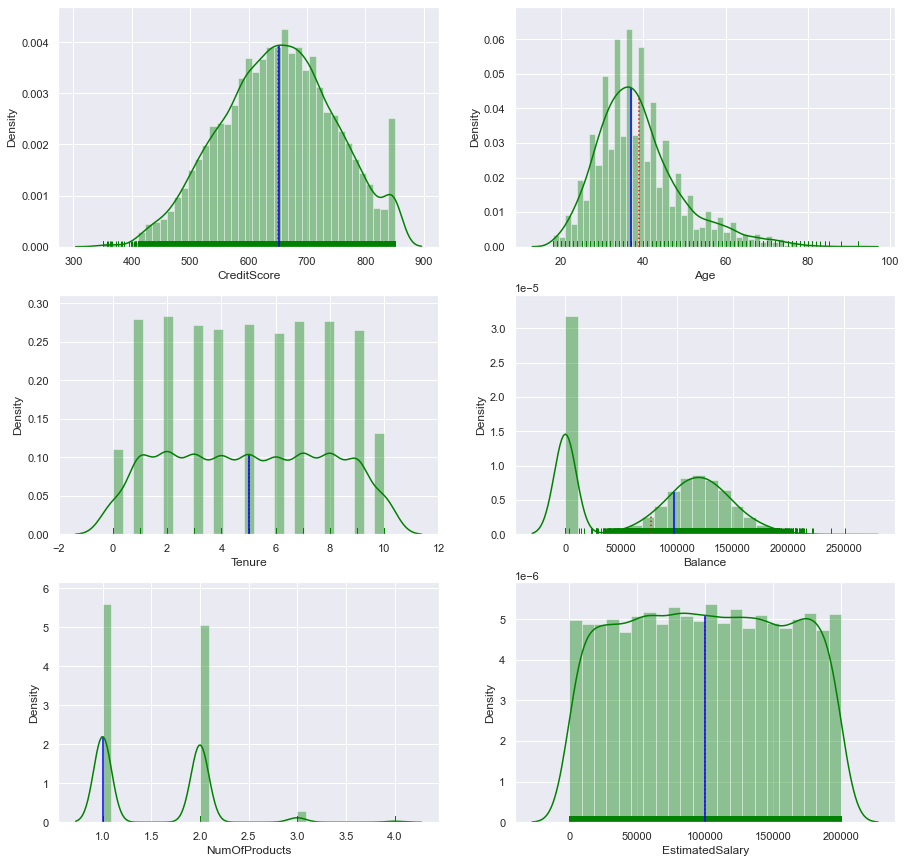

<IPython.core.display.Javascript object>

In [8]:
# plotting histograms for all numerical variables.

# List of numerical varaibles.
numerical_col = dfBankChurners.select_dtypes(include=np.number).columns.tolist()
# A plot with 3 rows and 2 columns, both zero indexed.
# Row i and Column j represented by axes[i,j] will represnt one histogram
# For example the 4th numerical variabble from numerical_col will have an index equal to 3
# int(3/2)=1 and 3%2=1(the rest) that will be in second row  and second column
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i in range(len(numerical_col)):
    ax = sns.distplot(
        ax=axes[int(i / 2), i % 2],
        x=dfBankChurners[numerical_col[i]],
        color="green",
        rug=True,
        axlabel=numerical_col[i],
    )
    line = ax.lines[0]
    xs = line.get_xdata()
    ys = line.get_ydata()
    # Plotting a dotted  red line for the mean after calculting the mean and the height of the line
    mean = dfBankChurners[numerical_col[i]].mean()
    height_mean = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height_mean, color="red", ls="dotted")
    # Plotting a solid blue line for the median after calculting the median and the height of the line
    median = dfBankChurners[numerical_col[i]].median()
    height_median = np.interp(median, xs, ys)
    ax.vlines(median, 0, height_median, color="blue", ls="solid")

**Observations**
- CreditScore, Tenure and EstimatedSalary are almost normally distributed where the mean equals the median.
- Balance is negatively skewed where the mean is less than the median.
- Age and NumOfProducts are positively skewed where the mean is higher than the median.
- 1 then 2 have by far the highest count among all observations for NumOfProducts. 

#### Investigating outliers in every numerical column

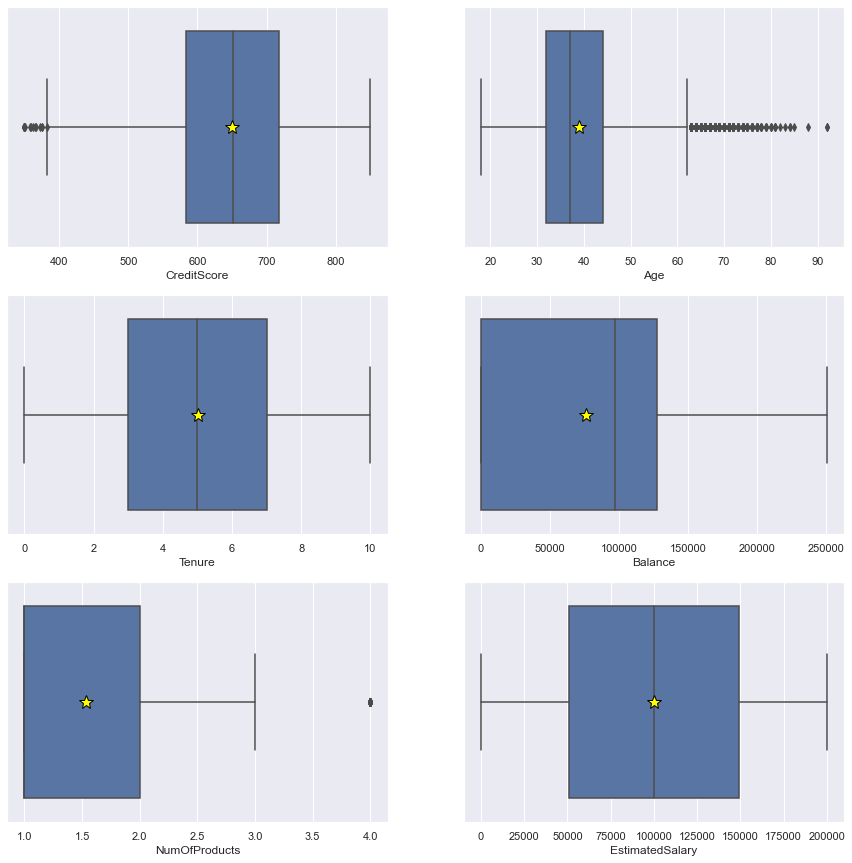

<IPython.core.display.Javascript object>

In [9]:
# outlier detection using boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
# A plot with 3 rows and 2 columns, both zero indexed.
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 4th numerical variabble from numerical_col here will have an index equal to 3
# int(3/2)=1 and 3%2=1(the rest) that will be in row index number 1(second row) and column index number 1(second column)

for i in range(len(numerical_col)):
    sns.boxplot(
        ax=axes[int(i / 2), i % 2],
        data=dfBankChurners,
        x=dfBankChurners[
            numerical_col[i]
        ],  # Plotting the mean on theboxplot as a yellow star with a black edge
        showmeans=True,
        meanprops={
            "marker": "*",
            "markerfacecolor": "yellow",
            "markeredgecolor": "black",
            "markersize": "15",
        },
    )

**Observations**
* Tenure, Balance, and EstimatedSalary have no outliers.
* Age has upper outliers, however we won't treat these as outliers since a customer can reach the age of 92.
* NumOfProducts has upper outliers, however we won't treat these as outliers since a customer can have 4 products that were purchased through the bank. A bank can offer many products such as Home Equity Loans, Certificates of Deposit, Credit cards, Checking accounts,Personal Loans.
* CreditScore has lower outliers, however we won't treat these as outliers since a customer with a very bad credit can have credit score as low as 350(actually a FICO score range between 300 and 850).

#### Distribution of  Categorical Variables

In [10]:
# Function to add the percentage of each class of the category
def perc_on_bar(plot, feature):
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage

<IPython.core.display.Javascript object>

In [1]:
# Plotting barplots for categorical variables.
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
# A plot with 3 rows and 2 columns, both zero indexed.
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 4th categorical variable from categorical_col here is IsActiveMember will have an index equal to 3
# int(3/2)=1 and 3%2=1(the rest) that will be in row number 1(second row) and column number 1(second column)

for i in range(len(categorical_col)):
    ax = sns.countplot(
        ax=axes[int(i / 2), i % 2],
        data=dfBankChurners,
        x=dfBankChurners[categorical_col[i]],
    )
    perc_on_bar(ax, dfBankChurners[categorical_col[i]])

NameError: name 'plt' is not defined

**Observations**
* Most the customers live in France(50.1%), then Germany(25.1%), then Spain(24.8%),.
* 20.4% of the customers are churners(customers that exited the bank services).
* 45.4% of the customers are females and 54.6% are males.
* Majority of the customers(~70.5%) have at least one credit card.
* 51.5% of the customers are active where they are using the bank products regularly such as making transactions.

### Bivariate Analysis

#### Relationship between numerical variables using pair plots and correlation plots 

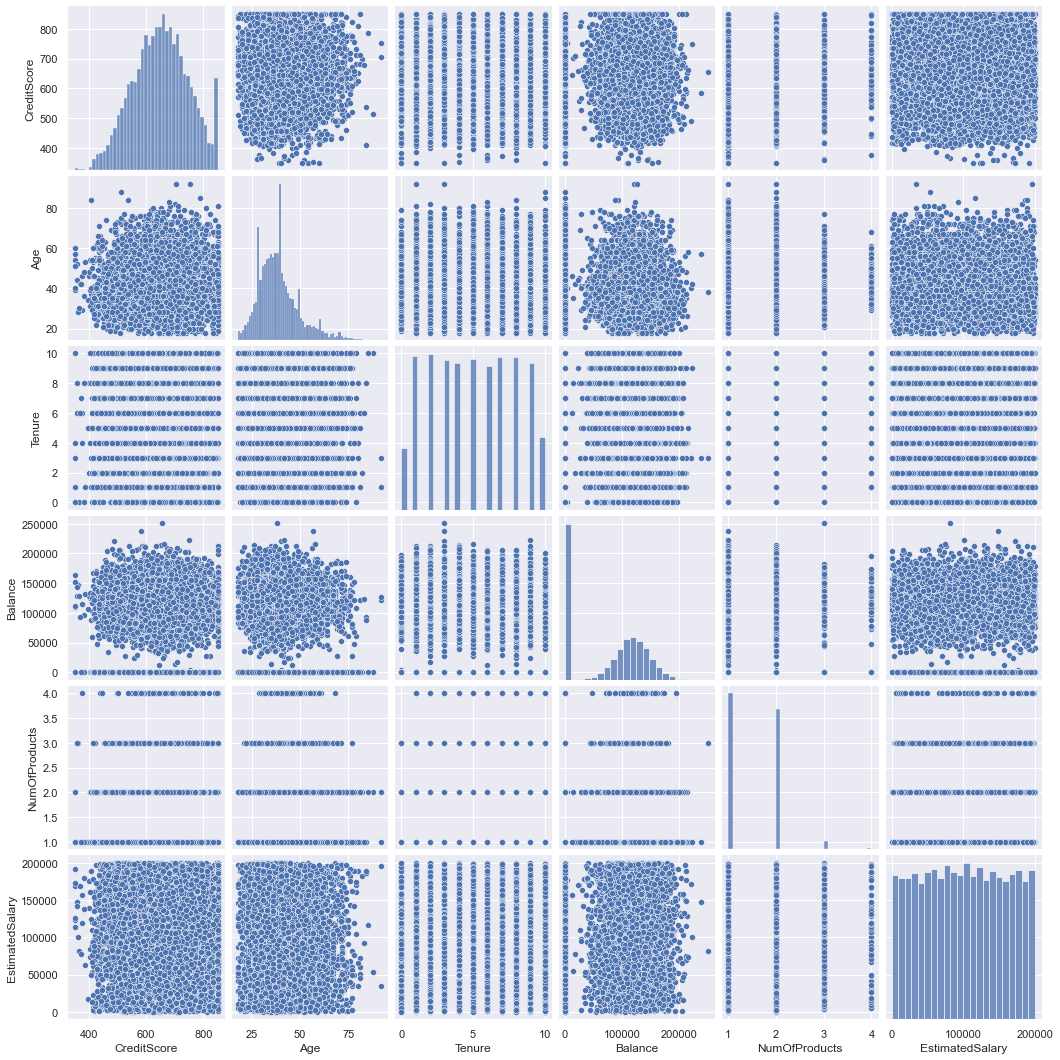

<IPython.core.display.Javascript object>

In [12]:
# pairplot: Visualize pairwise relationship in the dataset.
sns.pairplot(dfBankChurners[numerical_col])

<AxesSubplot:>

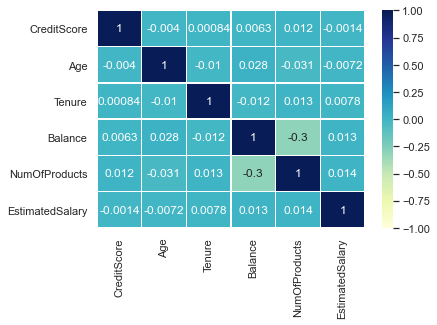

<IPython.core.display.Javascript object>

In [13]:
# heatmap: Plot rectangular data as a color-encoded matrix, where each cell represents the correlation between
# the two corresponding quantitative attributes
sns.heatmap(
    dfBankChurners[numerical_col].corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cmap="YlGnBu",
    vmin=-1,
    vmax=1,
)

**Observations**
- There are no strong correlations between the numerical variables.
- There is a negative correlation between Balance and NumOfProducts.
- There are a very weak correaltions between the other numerical variables.

#### Exited vs CreditScore

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

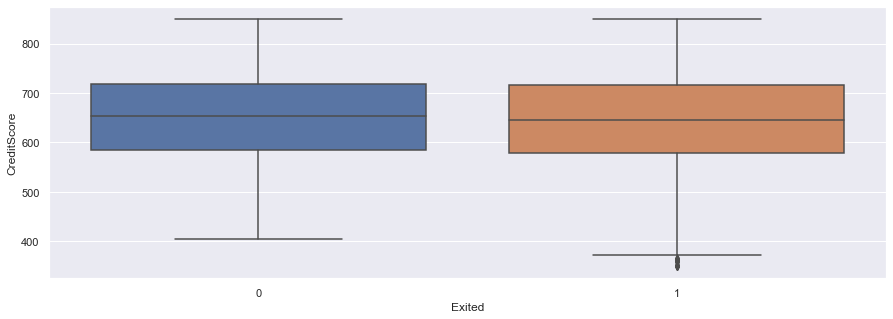

<IPython.core.display.Javascript object>

In [14]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(x="Exited", y="CreditScore", data=dfBankChurners)

**Observations**
- The median CreditScore is slightly lower for customers that Exited the bank(churners) when compared to customers that did not.
- Customers that didn't churn have a credit score > 400.

#### Exited vs Age

<AxesSubplot:xlabel='Exited', ylabel='Age'>

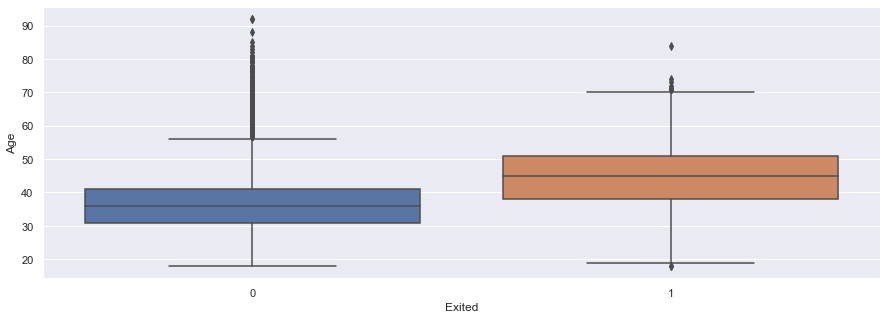

<IPython.core.display.Javascript object>

In [15]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(x="Exited", y="Age", data=dfBankChurners)

**Observations**
- The median age is higher by about 10 years for customers that Exited the bank(churners) when compared to customers that did not.

#### Exited vs Tenure

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

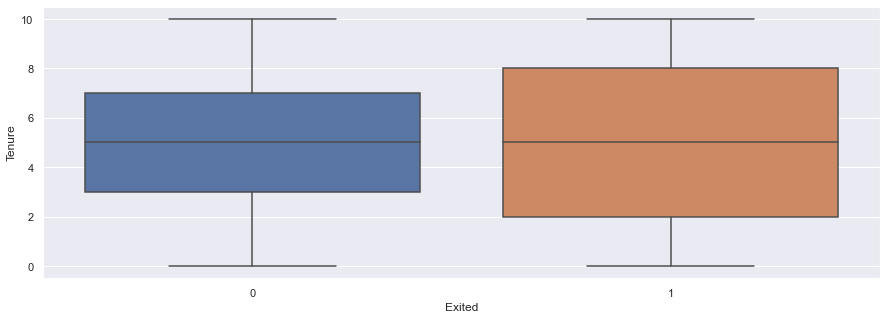

<IPython.core.display.Javascript object>

In [16]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(x="Exited", y="Tenure", data=dfBankChurners)

**Observations**
- The median Tenure is the same for customers that Exited the bank and for customers that didn't.
- 50% of the customers that exited have a tenure between 2 and 8 years, while 50% of the customers that didn't exit the bank have a tenure between 3 and 7 years.

#### Exited vs Balance

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

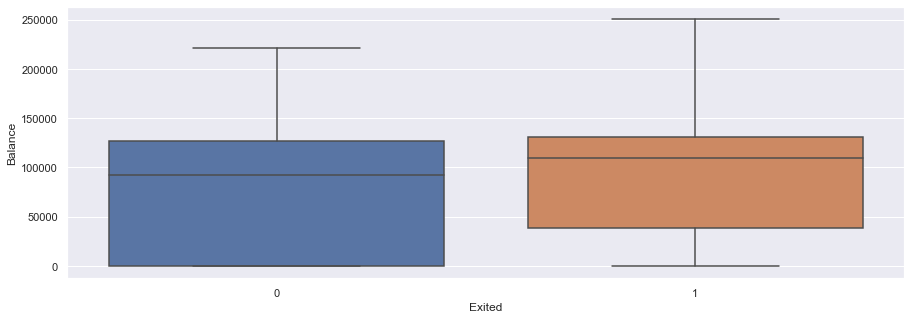

<IPython.core.display.Javascript object>

In [17]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(x="Exited", y="Balance", data=dfBankChurners)

**Observations**
- The median Balance for customers that exited the bank is higher than customers that didn't.

#### Exited vs NumOfProducts

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

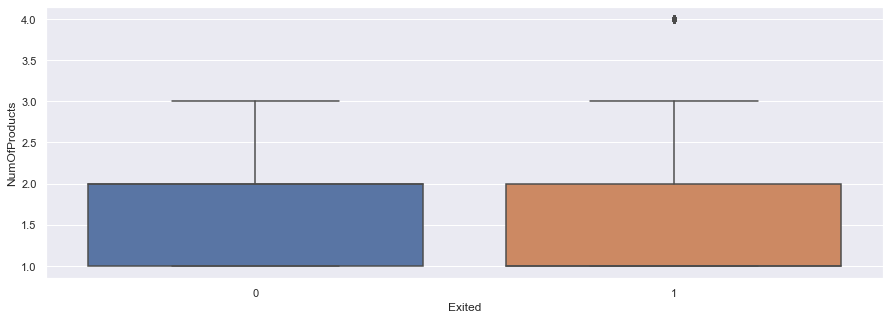

<IPython.core.display.Javascript object>

In [18]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(x="Exited", y="NumOfProducts", data=dfBankChurners)

**Observations**
- The distribution of NumOfProducts is the same for customers that Exited and customers that didn't.

#### Exited vs EstimatedSalary

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

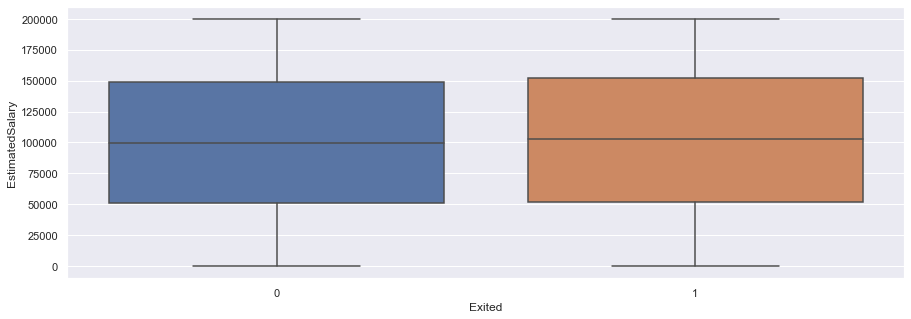

<IPython.core.display.Javascript object>

In [19]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(x="Exited", y="EstimatedSalary", data=dfBankChurners)

**Observations**
- The distribution of NumOfProducts is the same for customers that Exited and customers that didn't.

In [20]:
# Function to plot a stacked bar charts of the target:Exited vs an independent variable
def stacked_plot(x):
    #     sns.set(palette='twilight_shifted')
    tab1 = pd.crosstab(x, dfBankChurners["Exited"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, dfBankChurners["Exited"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### Exited vs Geography

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


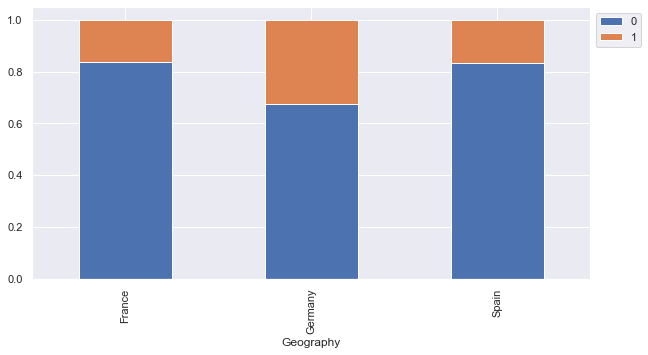

<IPython.core.display.Javascript object>

In [21]:
stacked_plot(dfBankChurners["Geography"])

**Observations**
- The percentage of customers that Exited the bank is the highest(about double) among customers from Germany when compared to French and Spanish customers.
- The percentage of customers that Exited is the same between French and Spanish customers.

#### Exited vs Gender

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


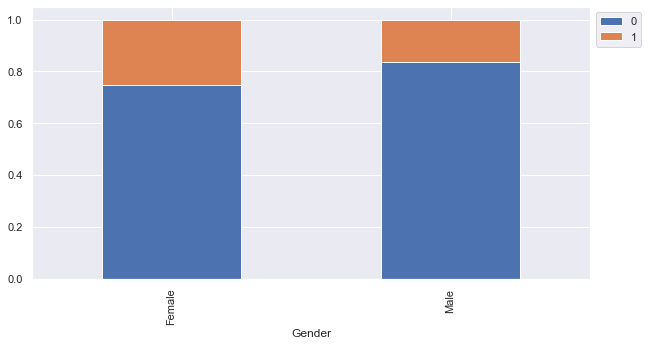

<IPython.core.display.Javascript object>

In [22]:
stacked_plot(dfBankChurners["Gender"])

**Observations**
- The percentage of customers that Exited the bank is higher(about the double) for females than males.

#### Exited vs HasCrCard

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


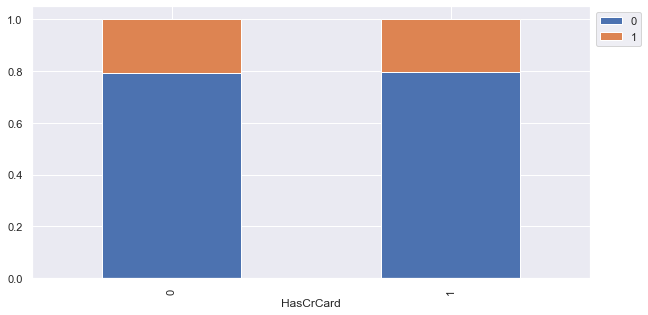

<IPython.core.display.Javascript object>

In [23]:
stacked_plot(dfBankChurners["HasCrCard"])

**Observations**
- The distribution of HasCrCard is the same for customers that exited and customers that didn't.

#### Exited vs IsActiveMember

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


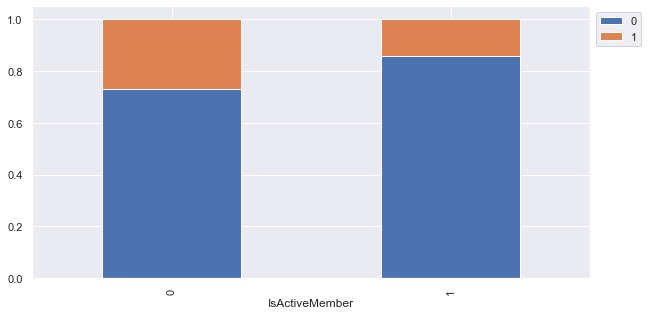

<IPython.core.display.Javascript object>

In [24]:
stacked_plot(dfBankChurners["IsActiveMember"])

**Observations**
- As expected, the percentage of customers that Exited the bank is higher(about the double) for inactive customers when compared to active customers.

### Conclusion and Insights

* Customers that exited the bank have a lower median credit scores than customers that didn't, plus customers that have a credit score less than 400 exited the bank
    - **The bank should enforce a stricter policies for customers with poor credit scores, especially with customers that have a credit score that is lower than 400.**
* Customers that exited the bank have a higher median age than customers that didn't
    - **The bank should offer incentives to attract young customers**
* Customers that exited the bank have a higher median balance than customers that didn't
    - **Perhaps the bank should reach to customers with high balances, and try to offer then incentives such as waiving some fees if they make payements toward their high balances.**
* The percentage of customers that exited the bank is the highest for german customers which is twice the percentage of french and spanish customers that exited the bank, and also for female customers (twice the percentage of male customers).
    - **The bank should pay more attention to such customers perhaps by implementing a process to obtain customer feedbacks.If customers haven't interacted with the bank for a while, the bank should reach out and re-establish its relationship with such customers. The bank can also  send newsletters including the bank updates and latest offers. The bank can intiate customer retention programs such as  customer loyalty program that reward customers for their continued commitment with the bank. These approaches can enforce the trust between the bank and its customers**
* The percentage of customers that exited the bank is higher(about the double) for inactive customers when compared to active customers.
    - **The bank should encourage customers to be more active, perhaps by offering bonuses, gifts, and lower fees for customers that use the bank products more frequently.**
 


## Data Preparation

### Splitting the data into train, validation, and test sets

In [25]:
# Independent variables.
X = dfBankChurners.drop(["Exited"], axis=1)
# The dependent variable.
y = dfBankChurners["Exited"]


# Creating dummies variable for the catgorical varaibles
X = pd.get_dummies(X, drop_first=True)

# Split X and y into train and test sets in 80:20 ratio, stratify=y:to ensure that relative class frequencies are approximately
# preserved in train and test sets(since in the data about 20% is for class 1 and ~80% for class 0).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y
)

# Splitting the train set into training set and validation set in 80:20 ratio and startifying the new created sets.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1, stratify=y_train
)

<IPython.core.display.Javascript object>

### Normalizing the train, validation and test data separately to avoid data leakage

In [26]:
# We will use MinMaxScalar as a normalizer. 
scaler = MinMaxScaler()
#Fit then transform on train set
X_train = scaler.fit_transform(X_train)
# Just Transform on validation and test sets to avoid data leakage
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


<IPython.core.display.Javascript object>

### Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a customer will Exit the bank(churn) when the customer doesn't(False Positives\ Type 1 error): Loss of effort  
2. Predicting a customer will not Exit the bank when the customer does(False Negatives\ Type 2 error): Loss of identifying a potential customer that will Exit the bank. Therefore this loss is expensive to the bank, since the bank goal is to minimize the number of the customers that will churn (renounce their bank services) by trying to prevent that from happening and therefore minimizing the bank loss.

#### Which case is more important? 
* The second case is more important. The bank trying to minimize the number of customers exiting the bank and by consequence minimizing its loss

####  How to reduce these losses?
* The bank wants Recall  to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall score with a good accuracy.

### Function to create the confusion matrix, and to calculate accuracy, recall, precision, and f1-score

In [27]:
def confusion_matrix_and_metrics(
    cf,
    group_names=["True Negative", "False Positive", "False Negative", "True Positive"],
    categories=["Exit-Not", "Exited"],
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Reds",
    title="Confusion Matrix and Metric Scores",
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{var1}{var2}{var3}".strip()
        for var1, var2, var3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

<IPython.core.display.Javascript object>

## Implementing Deep Neural Network Models

### Converting probabilities into classes
- Classify either as not exited (0) if outputed probabilty<= threshold, or exited (1) if outputed probabily> threshold.
- We will create a function named classify to implement that.

In [28]:
# Function to classify the record given the output probability and a threshold
def classify(model, threshold):
    y_pred = model.predict(X_test)
    for i in range(len(y_test)):
        if y_pred[i] > threshold:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

<IPython.core.display.Javascript object>

### Unbalanced Classes
- Our dataset in unbalanced, we can tackle this issue by:
    - Applying a class weights: Larger weight for the minority class(class1) and smaller weight for the majority class(class0).
    - Or use oversampling, we won't use in this project undersampling since DNN works well on a large dataset, and undersampling will lead to a small dataset for training.

#### Calculating the weights that will be assigned to each class

In [29]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    "balanced",
    np.unique(y_train),
    np.array([y_train.iloc[i] for i in range(len(y_train))]),
)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

<IPython.core.display.Javascript object>

### Model1 
- We will use a fully-connected NN made of:
    - Input layer as vector of size equal to the number of features\predictors.
    - 3 fully-connected hidden layers with ReLu activation: First hidden layer will have 12 nodes, second hidden layer will have 24 nodes, and third hidden layer will have 12 nodes.
    - Output layer with one node will that will output a probability distribution (sigmoid activation function)
    - kernel_initializer will be the default one which is:"glorot_uniform"

In [30]:
# initialize the model
Model1 = Sequential()
# Adding the input layer (by specifying input dimension) AND the first hidden layer (units), and relu as an activation function
Model1.add(Dense(units=12, input_dim=X.shape[1], activation="relu"))
# Adding Second hidden layer
Model1.add(Dense(units=24, activation="relu"))
# Adding Third hidden layer
Model1.add(Dense(12, activation="relu"))
# Adding Output layer of 1 node, which is the the desired dimensions of our output (Churn or not)
# We will use the sigmoid because we want probability outcomes
Model1.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

### Model compilation (optimizers and loss functions)

- Keras model should be "compiled" prior to training
- Types of loss (function) and optimizer should be designated


In [31]:
# Compile the model witn Adam optimizer with learning rate = 0.01
Model1.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

<IPython.core.display.Javascript object>

##  Model Training (Forward pass and Backpropagation)


In [32]:
# fitting the model with batch size of 128 and 15 epocks
history1 = Model1.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=15,
    validation_data=(X_val, y_val),
)

Epoch 1/15
50/50 [==============================] - 1s 8ms/step - loss: 0.4862 - accuracy: 0.7964 - val_loss: 0.4475 - val_accuracy: 0.7969
Epoch 2/15
50/50 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8105 - val_loss: 0.4339 - val_accuracy: 0.8094
Epoch 3/15
50/50 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8284 - val_loss: 0.3969 - val_accuracy: 0.8256
Epoch 4/15
50/50 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8361 - val_loss: 0.3651 - val_accuracy: 0.8469
Epoch 5/15
50/50 [==============================] - 0s 4ms/step - loss: 0.3600 - accuracy: 0.8502 - val_loss: 0.3912 - val_accuracy: 0.8356
Epoch 6/15
50/50 [==============================] - 0s 4ms/step - loss: 0.3624 - accuracy: 0.8505 - val_loss: 0.3644 - val_accuracy: 0.8456
Epoch 7/15
50/50 [==============================] - 0s 4ms/step - loss: 0.3560 - accuracy: 0.8542 - val_loss: 0.3600 - val_accuracy: 0.8475
Epoch 8/15
50/50 [==

<IPython.core.display.Javascript object>

#### Plotting the train and validation loss

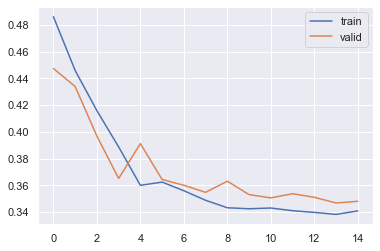

<IPython.core.display.Javascript object>

In [33]:
# Capturing learning history per epoch
hist = pd.DataFrame(history1.history)
hist["epoch"] = history1.epoch

# Plotting the loss at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

**Observations**
- The model had a good generalization.

### Model Evaluation with threshold equal to 0.5

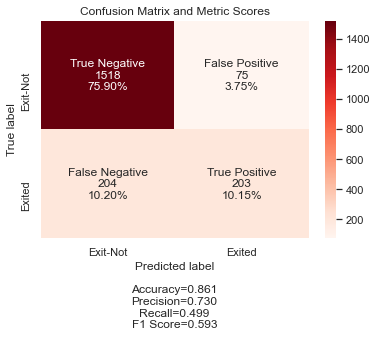

<IPython.core.display.Javascript object>

In [34]:
y_pred1 = classify(Model1, 0.5)
cm1 = confusion_matrix(y_test, y_pred1)
confusion_matrix_and_metrics(cm1)

**Observations**
- We achieved an accuracy of 86.1%, however the recall which is our main metric is very low: 49.9%
- Let's try to improve the recall score by finding the optimal threshold via roc_curve

### Improving the Recall score by finding the optimal threshold via roc_curve

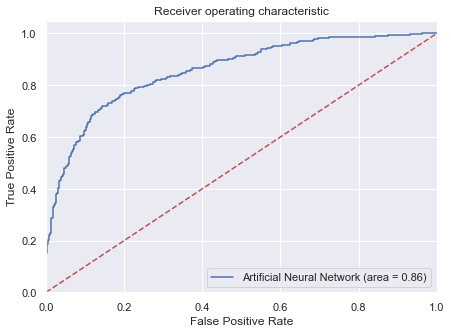

Optimal threshold : 0.2740879


<IPython.core.display.Javascript object>

In [35]:
# We will use validation sets to tune the the threshold
ANN_roc_auc_train = roc_auc_score(y_val, Model1.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, Model1.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Artificial Neural Network (area = %0.2f)" % ANN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold :", optimal_threshold)

### Model evaluation with optimal threshold

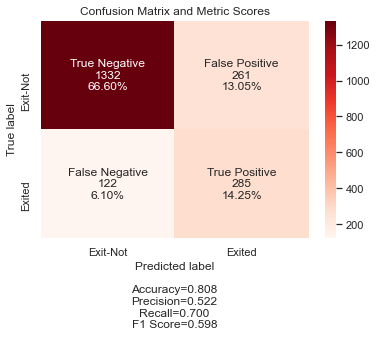

<IPython.core.display.Javascript object>

In [36]:
## Confusion Matrix on unseen test set
y_pred1 = classify(Model1, optimal_threshold)
cm1 = confusion_matrix(y_test, y_pred1)
confusion_matrix_and_metrics(cm1)

**Observations**
- The recall score did improve by about 20% by achieving a recall score of 70%, however the accuracy did slightly drop to ~81%. Since our main metric is recall, then Model1 with optimal threshold had a better performance.
- Let's tune some hyperparameters to try to improve the model performance.

### Model2

**We will keep the same architecture As Model 1, however we will try to tune some hyperparameters**

- **Learning rate:**

    - The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs. Here we will try smaller learnning rate and increase the number of epocks, and larger learnning rate with smaller number of epocks.
    
- **class_weight:**

    - Here we have an unbalanced dataset(~20% for class 1:Exited, and ~80% for class 0:Didn't Exit, by assigning large weight to the minority class and small weight to the majority class the model can adjust to this unbalance.

- **Early stopping:** 

    - During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

- This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

- **Weight Initialization**

    - Weight initialization is an important consideration in the design of a neural network model.
    - Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.
    - This optimization algorithm requires a starting point in the space of possible weight values from which to begin the optimization process. Weight initialization is a procedure to set the weights of a neural network to small random values that define the starting point for the optimization (learning or training) of the neural network model.
    - There are many WI techniques as follows:
      - 1) Random normal initialization
      - 2) Random Uniform initialization
      - 3) Xaviour Initialization
      - 4) He Initialization which we will use in Model2

 - **Dropout**
     - Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.


### Building, compiling, and training the model

In [37]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=20,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(12, input_dim=X.shape[1], kernel_initializer='he_normal', activation='relu'))
# Adding dropout to control the overfitting, randomly drop 40 of the nodes of the first layer
Model2.add(Dropout(0.4))
Model2.add(Dense(24, kernel_initializer='he_normal', activation='relu'))
# Adding dropout to control the overfitting
Model2.add(Dropout(0.4))
Model2.add(Dense(12, kernel_initializer='he_normal', activation='relu'))
# Adding dropout to control the overfitting
Model2.add(Dropout(0.2))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
#Model compiling with Adam optimizer and a learing rate of 0.007
Model2.compile(optimizer=optimizers.Adam(learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy'])
#Model training with earlystopping and class weights, then capturing the training history  
history2= Model2.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=64, epochs=100,class_weight=class_weights, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.7035 - accuracy: 0.4956 - val_loss: 0.7153 - val_accuracy: 0.3450
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5247 - val_loss: 0.6595 - val_accuracy: 0.6500
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5723 - val_loss: 0.6799 - val_accuracy: 0.5900
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.5759 - val_loss: 0.6330 - val_accuracy: 0.6094
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 0.6169 - val_loss: 0.6460 - val_accuracy: 0.6944
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6394 - accuracy: 0.6328 - val_loss: 0.6258 - val_accuracy: 0.7156
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.6650 - val_loss: 0.6110 - val_accuracy: 0.7269

Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7636 - val_loss: 0.5616 - val_accuracy: 0.7613
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7264 - val_loss: 0.4775 - val_accuracy: 0.8025
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7494 - val_loss: 0.5740 - val_accuracy: 0.7106
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7336 - val_loss: 0.4929 - val_accuracy: 0.7756


<IPython.core.display.Javascript object>

#### Plotting the test and validation loss.

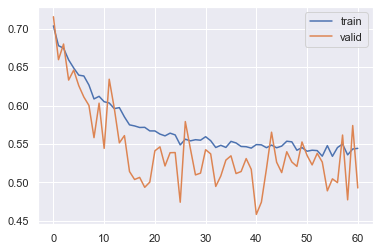

<IPython.core.display.Javascript object>

In [38]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


**Observations**
- Model2 did generalize well.

### Model evaluation with threshold equal to 0.5

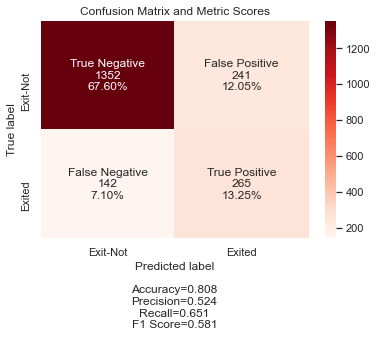

<IPython.core.display.Javascript object>

In [39]:
## Confusion Matrix on unseen test set
y_pred2 = classify(Model2, 0.5)
cm2 = confusion_matrix(y_test, y_pred2)
confusion_matrix_and_metrics(cm2)

**Observations**
- The model did achieve an accuracy of ~81% and a recall score of ~65%.
- Let's try to improve the recall score by finding the optimal threshold via roc_curve

### Improving the Recall by finding the optimal threshold via roc_curve

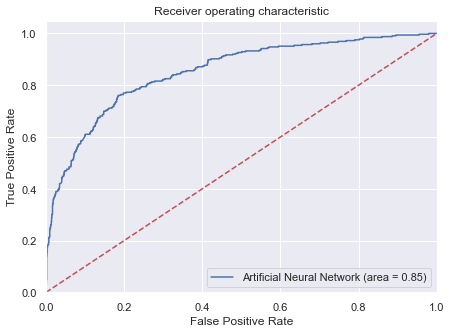

Optimal threshold : 0.40710154


<IPython.core.display.Javascript object>

In [40]:
ANN_roc_auc_train = roc_auc_score(y_val, Model2.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, Model2.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Artificial Neural Network (area = %0.2f)" % ANN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold :", optimal_threshold)

### Model evaluation with optimal threshold.

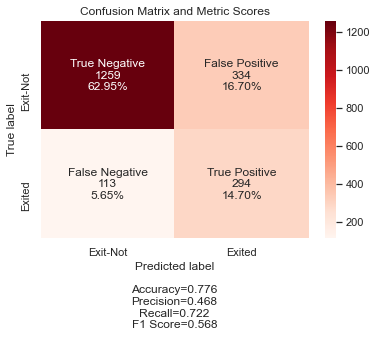

<IPython.core.display.Javascript object>

In [41]:
## Confusion Matrix on unseen test set
y_pred2 = classify(Model2, optimal_threshold)
cm2 = confusion_matrix(y_test, y_pred2)
confusion_matrix_and_metrics(cm2)

**Observations**
- The recall score did improve to ~72% with the optimal threshold. So far Model2 with optimal threshold achieved a the best recall score with acceptable accuracy of ~78%.
- Let's try a different DNN architecture to see if we can achieve better performance.

### Model3
- In this model we will try a deeper NN with 4 hidden layers having respectively 100, 70,30, and 16 nodes (from hidden layer1 to hidden layer4). All hidden layer will have a relu activation function.
- We will use dropout to control overfitting.
- We will use class weights to recomponsate for the unbalanced dataset(~20% for class 1:Exited, and ~80% for class 0: Didn't exit.) 

### Building, compiling, and training Model3

In [42]:
Model3 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Model3.add(Dense(units=100, input_dim=X.shape[1], activation="relu"))
Model3.add(Dropout(0.5))
# Second hidden layer
# Model3.add(BatchNormalization())
Model3.add(Dense(units=70, activation="relu"))
# Adding Dropout to prevent overfitting
Model3.add(Dropout(0.5))
# Third hidden layer
Model3.add(Dense(units=30, activation="relu"))
Model3.add(Dropout(0.5))
# Fourth hidden layer
Model3.add(Dense(units=16, activation="relu"))
# Adding Dropout to prevent overfitting
Model3.add(Dropout(0.5))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Churn or not)
# We use the sigmoid because we want probability outcomes
Model3.add(Dense(1, activation="sigmoid"))
# Compiling the model with Adam optimizer and learning rate of 0.005
Model3.compile(
    optimizer=optimizers.Adam(learning_rate=0.005),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
# Training the model with epocks equal to 150, since we are using a smaller learning rate(defualt os 0.005)
# We are using class weights to make up for the unbalanced data set.
history3 = Model3.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=150,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    shuffle=True,
)

Epoch 1/150
50/50 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5481 - val_loss: 0.6494 - val_accuracy: 0.7462
Epoch 2/150
50/50 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.5723 - val_loss: 0.6554 - val_accuracy: 0.6531
Epoch 3/150
50/50 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6405 - val_loss: 0.6162 - val_accuracy: 0.7169
Epoch 4/150
50/50 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.6698 - val_loss: 0.6065 - val_accuracy: 0.7181
Epoch 5/150
50/50 [==============================] - 0s 6ms/step - loss: 0.6161 - accuracy: 0.7091 - val_loss: 0.5513 - val_accuracy: 0.7594
Epoch 6/150
50/50 [==============================] - 0s 5ms/step - loss: 0.5978 - accuracy: 0.7261 - val_loss: 0.5376 - val_accuracy: 0.8194
Epoch 7/150
50/50 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.7544 - val_loss: 0.5320 - val_accuracy: 0.8081
Epoch 8/150
5

Epoch 59/150
50/50 [==============================] - 0s 4ms/step - loss: 0.5090 - accuracy: 0.7608 - val_loss: 0.4857 - val_accuracy: 0.7219
Epoch 60/150
50/50 [==============================] - 0s 4ms/step - loss: 0.5119 - accuracy: 0.7692 - val_loss: 0.4750 - val_accuracy: 0.7675
Epoch 61/150
50/50 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7559 - val_loss: 0.4864 - val_accuracy: 0.7756
Epoch 62/150
50/50 [==============================] - 0s 4ms/step - loss: 0.5058 - accuracy: 0.7638 - val_loss: 0.4551 - val_accuracy: 0.8112
Epoch 63/150
50/50 [==============================] - 0s 5ms/step - loss: 0.4976 - accuracy: 0.7603 - val_loss: 0.4235 - val_accuracy: 0.8200
Epoch 64/150
50/50 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.7780 - val_loss: 0.4799 - val_accuracy: 0.7825
Epoch 65/150
50/50 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7769 - val_loss: 0.4585 - val_accuracy: 0.7950
Epoch 

<IPython.core.display.Javascript object>

### Plotting the test and validation losses

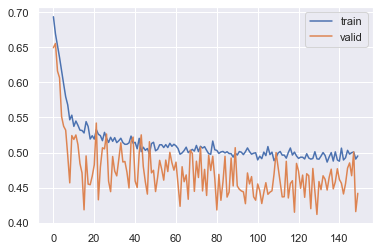

<IPython.core.display.Javascript object>

In [43]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch

# Plotting loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


** Observations**
- Model3 did generalize well!!

### Model evaluationg with threshold equal to 0.5

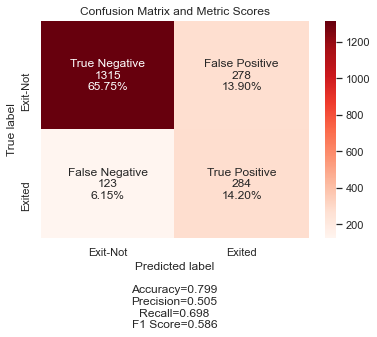

<IPython.core.display.Javascript object>

In [44]:
## Confusion Matrix on unseen test set
y_pred3 = classify(Model3, 0.5)
cm3 = confusion_matrix(y_test, y_pred3)
confusion_matrix_and_metrics(cm3)

**Observations**
- The model did achieve an accuracy of ~80% and a recall score of ~70%.
- Let's try to improve the recall score by finding the optimal threshold via roc_curve

### Improving the Recall by finding the optimal threshold via roc_curve

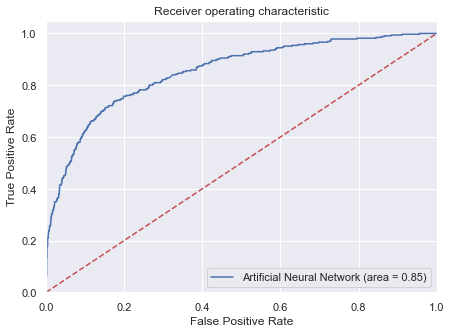

Optimal threshold : 0.47923514


<IPython.core.display.Javascript object>

In [45]:
ANN_roc_auc_train = roc_auc_score(y_val, Model3.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, Model3.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Artificial Neural Network (area = %0.2f)" % ANN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold :", optimal_threshold)

### Model evaluation with optimal threshold

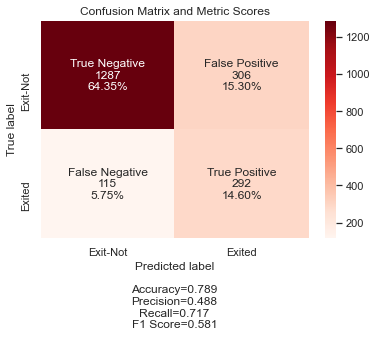

<IPython.core.display.Javascript object>

In [46]:
## Confusion Matrix on unseen test set
y_pred3 = classify(Model3, optimal_threshold)
cm3 = confusion_matrix(y_test, y_pred3)
confusion_matrix_and_metrics(cm3)

**Observations**
- The recall did improve to achieve a score of 71.7%. However  Model2 with optimal threshold  had the best performance with regard to our main metric which is the recall.
- Let's try a simpler DNN architecture to see if we can achieve better performances.

### Model4
- In Model4 we will try a simpler DNN architecture, it will have  two hidden layers, each layer with 16 nodes. Both layers will have a relu activation function

### Buildind, compiling, and training Model4

In [47]:
Model4 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Model4.add(Dense(units=16, input_dim=X.shape[1], activation="relu"))
# Second hidden layer
Model4.add(Dense(units=16, activation="relu"))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Churn or not)
# We use the sigmoid because we want probability outcomes
Model4.add(Dense(1, activation="sigmoid"))
# Compiling the model with adam optimizer and a learning rate value of 0.01
Model4.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
# Training the model with applied class weights with 50 epochs
history4 = Model4.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    shuffle=True,
)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.6351 - accuracy: 0.6306 - val_loss: 0.5996 - val_accuracy: 0.6812
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7214 - val_loss: 0.4512 - val_accuracy: 0.8094
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7472 - val_loss: 0.5173 - val_accuracy: 0.7550
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7514 - val_loss: 0.4239 - val_accuracy: 0.8062
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7600 - val_loss: 0.4343 - val_accuracy: 0.8069
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7620 - val_loss: 0.4880 - val_accuracy: 0.7744
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7714 - val_loss: 0.4798 - val_accuracy: 0.7750
Epoch 

<IPython.core.display.Javascript object>

### Plotting test and validation losses 

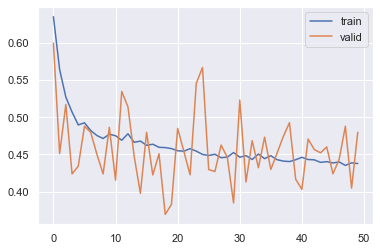

<IPython.core.display.Javascript object>

In [48]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history4.history)
hist['epoch'] = history4.epoch

# Plotting the loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


**Observations**
- The model had a good generalization.

### Model evaluation with threshold equals to 0.5

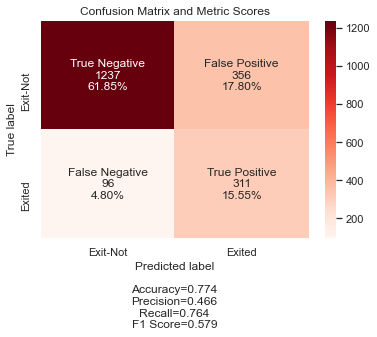

<IPython.core.display.Javascript object>

In [49]:
## Confusion Matrix on unseen test set
y_pred4 = classify(Model4, 0.5)
cm4 = confusion_matrix(y_test, y_pred4)
confusion_matrix_and_metrics(cm4)

**Observations**
- The model did achieve an accuracy of 77.4% and a recall score of 76.4%. So far this the best recall score.
- Let's try to improve the recall score by finding the optimal threshold via roc_curve

### Improving the Recall score by finding the optimal threshold via roc_curve

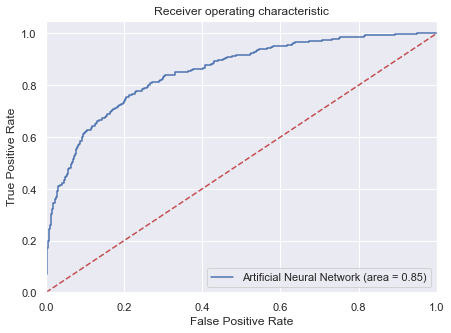

Optimal threshold : 0.52015024


<IPython.core.display.Javascript object>

In [50]:
ANN_roc_auc_train = roc_auc_score(y_val, Model4.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, Model4.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Artificial Neural Network (area = %0.2f)" % ANN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold :", optimal_threshold)

### Model evaluation with optimal threshold

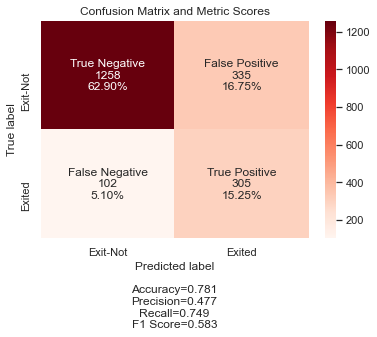

<IPython.core.display.Javascript object>

In [51]:
y_pred4 = classify(Model4, optimal_threshold)
cm4 = confusion_matrix(y_test, y_pred4)
confusion_matrix_and_metrics(cm4)

**Observations**
- The model with optimal threshold did achieve an accuracy of 78.1.4% and a recall score of ~75%. So far this the second best recall score which comes after the same model(Model4) with threshold that is equal to 0.5.

### Model5
- It looks like simpler architecture(2 hidden layers, and moderate number of nodes) gave the best recall scores.
- Model5 will have two hidden layers, with 40 nodes in the first hidden layer, however with the dropout(to reduce overfitting) of half of the nodes, only 20 random nodes will be used in training. The second hidden layer will have 20 nodes, but only 10 random nodes will be used for training given a dropout of 50%. Both hidden layers will have relu as an activation function.
- Instead of class weights we will use SMOTE to balance the two classes by creating syntetic records of class 1.
- We will use a smaller learning rate than the default value with higher number of epocks.

In [52]:
# Importing the SMOTE library and creating the SMOTE object: sm
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

# Balancing the two classes by creating syntetic records of class 1 using the SMOTE object
X_train_over_sm, y_train_over_sm = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [53]:
Model5 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Model5.add(Dense(units=40, input_dim=X.shape[1], activation="relu"))
# Adding Dropout to prevent overfitting
Model5.add(Dropout(0.5))
# Second hidden layer
Model5.add(Dense(units=20, activation="relu"))
# Adding Dropout to prevent overfitting
Model5.add(Dropout(0.5))
# we have an output of 1 node, which is the the desired dimensions of our output (Churn or not)
# We use the sigmoid because we want probability outcomes
Model5.add(Dense(1, activation="sigmoid"))
# Compiling the model with Adam optimizer and alearning rate of 0.005
Model5.compile(
    optimizer=optimizers.Adam(learning_rate=0.005),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
# Training the model with 200 epochs(small learning rate needs a high number of epochs)
# The model will be trained on the oversampled training set.
history5 = Model5.fit(
    X_train_over_sm,
    y_train_over_sm,
    batch_size=64,
    epochs=200,
    validation_data=(X_val, y_val),
    shuffle=True,
)

Epoch 1/200
160/160 [==============================] - 2s 5ms/step - loss: 0.6630 - accuracy: 0.5968 - val_loss: 0.6184 - val_accuracy: 0.6837
Epoch 2/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6648 - val_loss: 0.5558 - val_accuracy: 0.7431
Epoch 3/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.7046 - val_loss: 0.5328 - val_accuracy: 0.7344
Epoch 4/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.7235 - val_loss: 0.4689 - val_accuracy: 0.8025
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7368 - val_loss: 0.4431 - val_accuracy: 0.8100
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7433 - val_loss: 0.4294 - val_accuracy: 0.8081
Epoch 7/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7511 - val_loss: 0.4313 - val_accuracy: 0.8037

Epoch 114/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7819 - val_loss: 0.4605 - val_accuracy: 0.7669
Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7833 - val_loss: 0.4468 - val_accuracy: 0.7869
Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7863 - val_loss: 0.4581 - val_accuracy: 0.7688
Epoch 117/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7765 - val_loss: 0.4067 - val_accuracy: 0.8238
Epoch 118/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7851 - val_loss: 0.4285 - val_accuracy: 0.8119
Epoch 119/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7797 - val_loss: 0.4562 - val_accuracy: 0.7719
Epoch 120/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7815 - val_loss: 0.4297 - val_ac

<IPython.core.display.Javascript object>

#### Plotting the test and validation losses

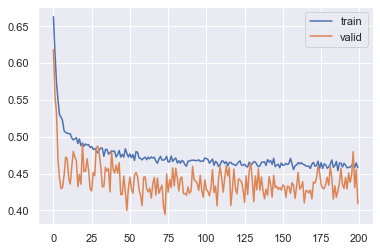

<IPython.core.display.Javascript object>

In [54]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history5.history)
hist['epoch'] = history5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


**Observations**
- The model did generalize well!!

### Model evaluation with threshold equals to 0.5

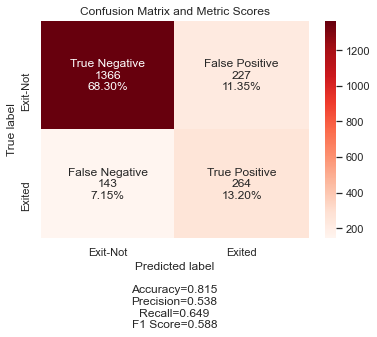

<IPython.core.display.Javascript object>

In [55]:
## Confusion Matrix on unseen test set
y_pred5 = classify(Model5, 0.5)
cm5 = confusion_matrix(y_test, y_pred5)
confusion_matrix_and_metrics(cm5)

**Observations**
- The model did achieve an accuracy of 81.5% and a recall score of 64.9%. So far Model4 with 0.5 threshold achieved the best recall score.
- Let's try to improve the recall score by finding the optimal threshold via roc_curve

### Improving the Recall score by finding the optimal threshold via roc_curve

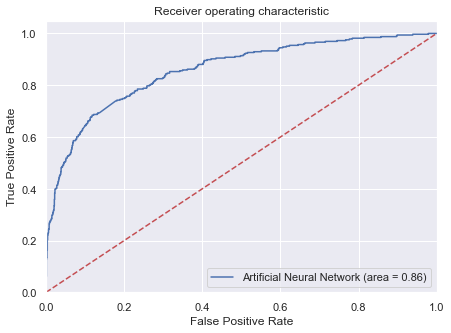

Optimal threshold : 0.5118732


<IPython.core.display.Javascript object>

In [56]:
ANN_roc_auc_train = roc_auc_score(y_val, Model5.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, Model5.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Artificial Neural Network (area = %0.2f)" % ANN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold :", optimal_threshold)

### Model evaluation with optimal threshold.

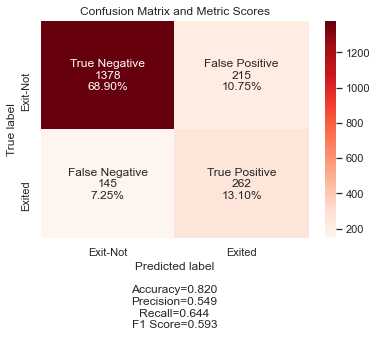

<IPython.core.display.Javascript object>

In [57]:
## Confusion Matrix on unseen test set
y_pred5 = y_pred5 = classify(Model5, optimal_threshold)
cm5 = confusion_matrix(y_test, y_pred5)
confusion_matrix_and_metrics(cm5)

**Observations**
- The model did achieve an accuracy of 82% and a recall score of 64.4%. So far Model4 with 0.5 threshold achieved the best recall score which is our main metric.
- Let's try another architecture with about the same complixity as Model5, however we will train the next model on a random oversampled training set with a larger learning rate and smaller number of epochs than Model5.

### Model6
- Model6 will have a simple DNN architecture with 2 hidden layers with 20 nodes in each layer, however only 16 random nodes will used for training in each hidden layer, since we will use dropout of 4 nodes(20% of 16).
- We will use a random oversampled training set instead of weights to make up for the unbalanced dataset.
- We will use a larger learining rate with smaller number of epochs.

In [58]:
# Importing the RandomOverSampler library and creating the RandomOverSampler object: ros
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

# Balancing the two classes by creating more records of class 1 using the ros object
X_ros, y_ros = ros.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [59]:
Model6 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Model6.add(Dense(units=20, input_dim=X.shape[1], activation="relu"))
# Adding Dropout to prevent overfitting
Model6.add(Dropout(0.2))
# Second hidden layer
Model6.add(Dense(units=20, activation="relu"))
# Adding Dropout to prevent overfitting
Model6.add(Dropout(0.2))
# we have an output of 1 node, which is the the desired dimensions of our output (Churn or not)
# We use the sigmoid because we want probability outcomes
Model6.add(Dense(1, activation="sigmoid"))
# compiling the model with Adam optimizer and a learning rate of 0.03
Model6.compile(
    optimizer=optimizers.Adam(learning_rate=0.03),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
# Training the model with 25 epochs since our learning rate is 0.03
history6 = Model6.fit(
    X_ros,
    y_ros,
    batch_size=16,
    epochs=10,
    validation_data=(X_val, y_val),
    shuffle=True,
)

Epoch 1/10
637/637 [==============================] - 2s 2ms/step - loss: 0.5993 - accuracy: 0.6712 - val_loss: 0.5741 - val_accuracy: 0.7719
Epoch 2/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7212 - val_loss: 0.5245 - val_accuracy: 0.7244
Epoch 3/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 0.7275 - val_loss: 0.4861 - val_accuracy: 0.7894
Epoch 4/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5428 - accuracy: 0.7263 - val_loss: 0.4380 - val_accuracy: 0.8363
Epoch 5/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.7315 - val_loss: 0.4924 - val_accuracy: 0.8150
Epoch 6/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7315 - val_loss: 0.4817 - val_accuracy: 0.8012
Epoch 7/10
637/637 [==============================] - 1s 2ms/step - loss: 0.5412 - accuracy: 0.7285 - val_loss: 0.4574 - val_accuracy: 0.8194
Epoch 

<IPython.core.display.Javascript object>

#### Plotting the train and validation losses

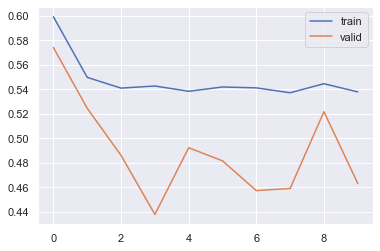

<IPython.core.display.Javascript object>

In [60]:
# Capturing learning history per epoch
hist = pd.DataFrame(history6.history)
hist["epoch"] = history6.epoch

# Plotting the losses at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

**Observations**
- The model genralized well!!

### Model evaluation with threshold equals to 0.5

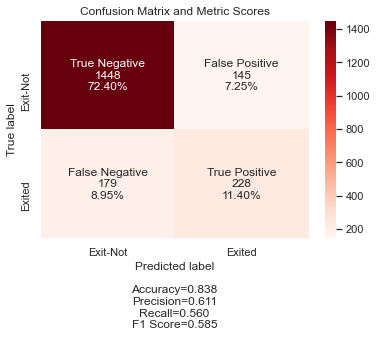

<IPython.core.display.Javascript object>

In [61]:
## Confusion Matrix on unseen test set
y_pred6 = classify(Model6, 0.5)
cm6 = confusion_matrix(y_test, y_pred6)
confusion_matrix_and_metrics(cm6)

**Observations**
- The model did achieve an accuracy of 83.8% and a recall score of 56%. So far Model4 with 0.5 threshold achieved the best recall score.
- Let's try to improve the recall score by finding the optimal threshold via roc_curve

### Improving the recall score by finding the optimal threshold using roc_curve 

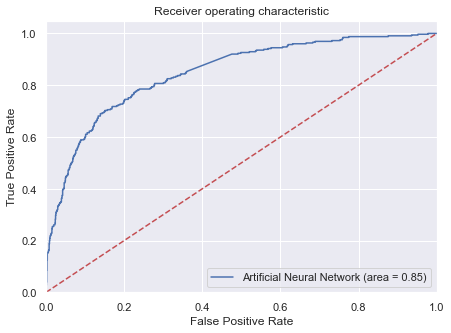

Optimal threshold : 0.4298119


<IPython.core.display.Javascript object>

In [62]:
ANN_roc_auc_train = roc_auc_score(y_val, Model6.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, Model6.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Artificial Neural Network (area = %0.2f)" % ANN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold :", optimal_threshold)

### Model evaluation with optimal threshold

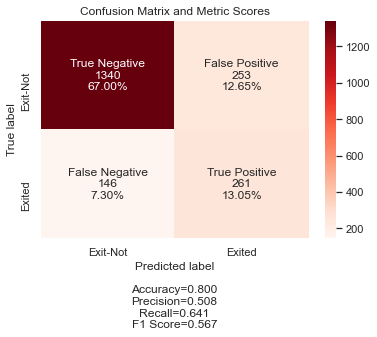

<IPython.core.display.Javascript object>

In [63]:
## Confusion Matrix on unseen test set
y_pred6 = classify(Model6, optimal_threshold)
cm6 = confusion_matrix(y_test, y_pred6)
confusion_matrix_and_metrics(cm6)

**Observations**
- 

**Observations**
- The model did achieve an accuracy of 80% and a recall score of 64.1%. So far Model4 with 0.5 threshold achieved the best recall score among all DNN models.

### RandomForest Model to compare to our DNN models.

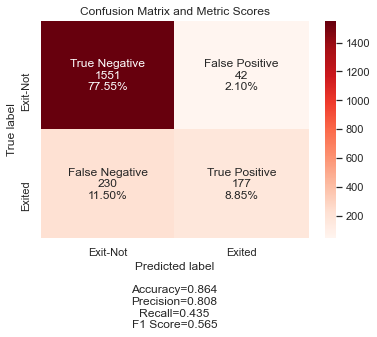

<IPython.core.display.Javascript object>

In [64]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, class_weight={0: 0.2, 1: 0.8})
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
cm6 = confusion_matrix(y_test, y_pred)
confusion_matrix_and_metrics(cm6)

**Observations**
- Recall score is very low. This model is comparable to Model1(without optimal threshold), however Model1 did achieve better recall score even without class weights and optimal threshold and about the same accuracy score. 
- All the DNN models achieved a better recall score than RandomForest with and without optimal threshold. 

## Conclusion

- Model4 with 0.5 threshold  achieved the highest recall score of 76.4%(accuracy 77.4%), followed by the same model(Model4) with optimal threshold that achieved a recall score of 75%(accuracy 78.1%), then comes third Model2 with optimal threshold which achieved a recall of 72.2% and accuracy of ~78%, then comes fourth Model3 with optimal threshold which achieved a recall score 71.1% and an accuracy of 79%, then comes Model1 with optimal threshold which achieved a recall score of 70% and an accuracy of 81%.

- DNN excels and performs very well on large datasets, here the data set is 10,000 records with only 6400 records for training, and this can explain the performance in term of accuracy and recall scores which they weren't very high scores.

- We recommend that the bank should use Model4 with a threshold value equals to 0.5 in identifying wich customers that are more likely to churn since this model achieved the minumum number of false negatives(highest recall score), and try to implement the following recommendations beside the ones given in the **Conclusion and Insights** of the EDA section:

    - **The bank should try to send a personalized, hand-written “Thank You” note to the customers to acknowledge the privilege of working with them.**

    - **The bank should try to offer VIP programs since this gives the bank clients the feeling of uniqueness and exclusivity, which is usually an appreciated feeling**

    - **The bank should try to offer one-time promotions such as lower interest rates by inviting the customers with high likelihood of churning to take part in special campaigns that last only a limited amount of time. This will drive engagement and additional conversions, while increasing the retention rate simultaneously.**
    
    - **The bank should keep the communication clear and straightforward right from the beginning, for example by mentioning minor but annoying things such as hidden costs and extra transaction fees because usually customers appreciate bank's honesty.**
    
